In [1]:
import pandas as pd
%matplotlib inline
#Вивести перші рядки таблиці за допомогою методу head
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url)
df = tables[12]
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [2]:
#Замініть у таблиці значення "—" на значення NaN
df.replace("—", pd.NA, inplace=True)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,<NA>,<NA>
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,<NA>


In [3]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(f"кількість рядків та стовпців:{df.shape}")

кількість рядків та стовпців:(28, 9)


In [17]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("Типи стовпців:", df.dtypes)

Типи стовпців: Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [10]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df['2014'] = pd.to_numeric(df['2014'])
df['2019'] = pd.to_numeric(df['2019'])

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [6]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print("Частка пропусків у кожному стовпці:")
print(df.isnull().sum() / len(df))

Частка пропусків у кожному стовпці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [7]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop(df.index[-1])

In [27]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
numeric_columns = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[numeric_columns] = df[numeric_columns].round().astype(int)

In [14]:
# Виведіть список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_higher_than_average_2019 = df[df['2019'] > df['2019'].mean()]
print("Регіони з народжуваністю вище середньої в 2019 році:")
print(regions_higher_than_average_2019['Регіон'])

Регіони з народжуваністю вище середньої в 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [15]:
# Знайдіть регіон з найвищою народжуваністю у 2014 році
region_with_highest_birthrate_2014 = df[df['2014'] == df['2014'].max()]
print("Регіон з найвищою народжуваністю у 2014 році:")
print(region_with_highest_birthrate_2014['Регіон'])

Регіон з найвищою народжуваністю у 2014 році:
16    Рівненська
Name: Регіон, dtype: object


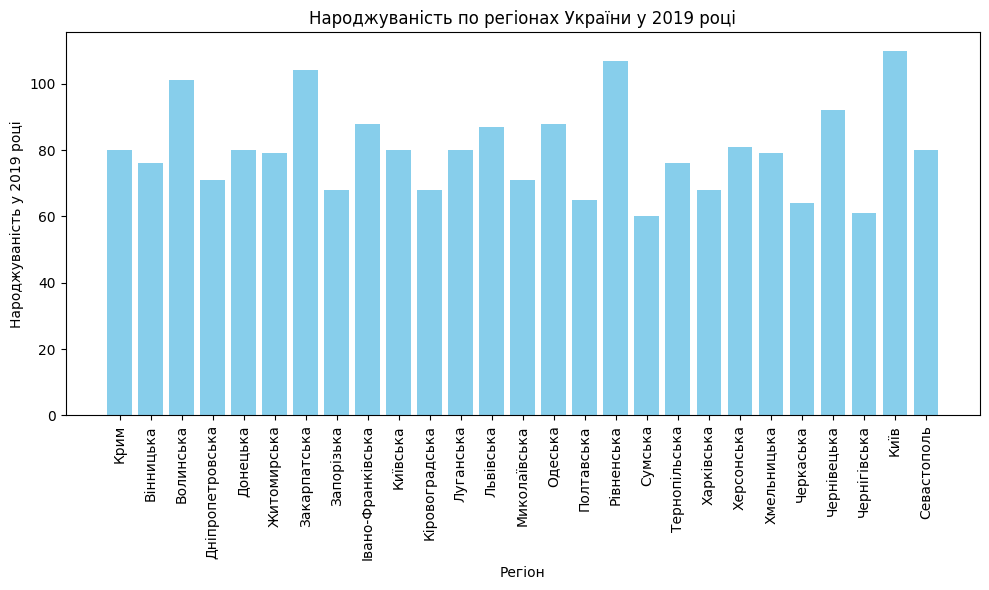

In [51]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.tight_layout()
plt.show()


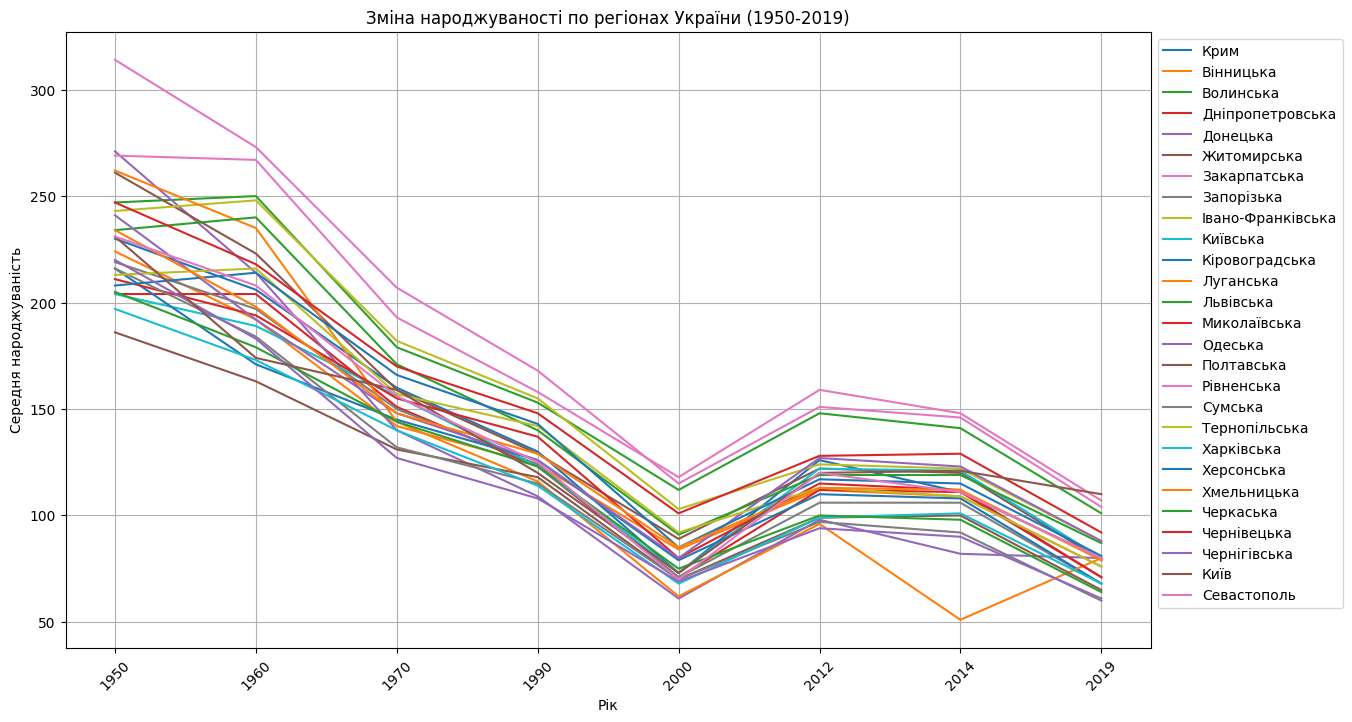

In [33]:
years = df.columns[1:]
regions = df['Регіон']
data = df.iloc[:, 1:]

plt.figure(figsize=(14, 8))
for i in range(len(regions)):
    plt.plot(years, data.iloc[i], label=regions[i])

plt.xlabel('Рік')
plt.ylabel('Середня народжуваність')
plt.title('Зміна народжуваності по регіонах України (1950-2019)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

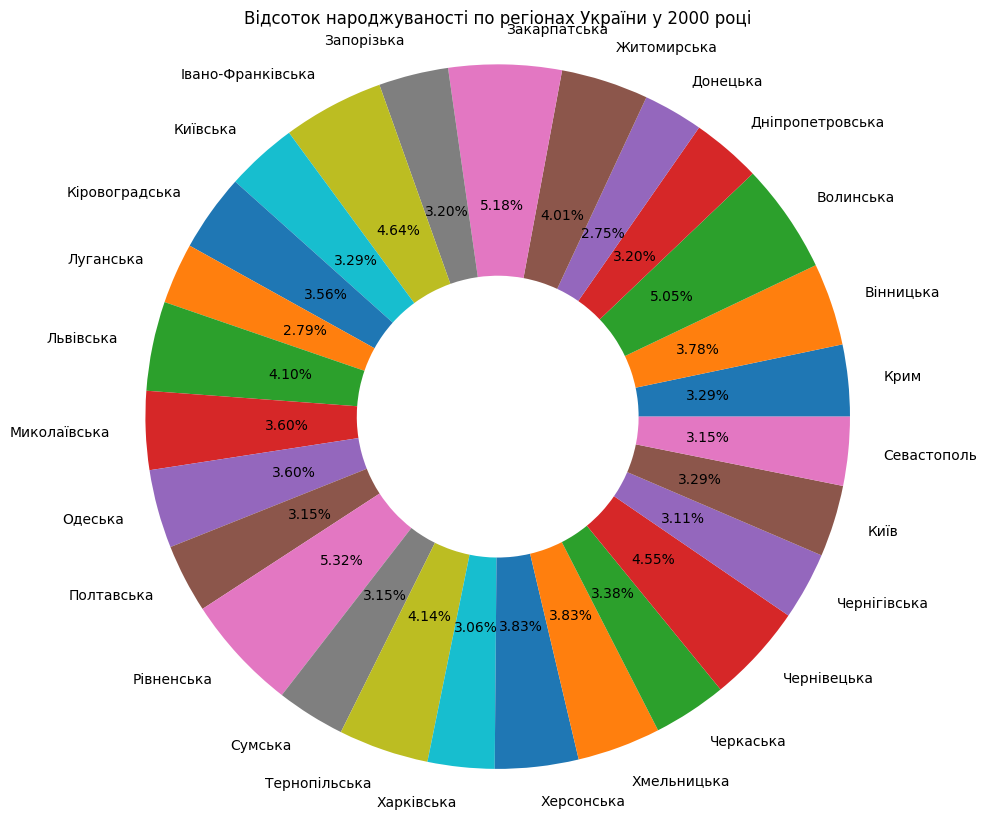

In [50]:
df['Percentage_2000'] = (df['2000'] / df['2000'].sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(df['Percentage_2000'], labels=df['Регіон'], autopct='%1.2f%%', wedgeprops={'width': 0.6})
plt.title('Відсоток народжуваності по регіонах України у 2000 році')
plt.axis('equal')
plt.show()